<a href="https://colab.research.google.com/github/mofuoku417/multivariate-time-series-prediction-of-crude-palm-oil-price-data-science-approach/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###install pandas_bokeh

In [1]:
!pip install pandas_bokeh

###Mount G-Drive

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!ls

gdrive	sample_data


In [ ]:
#!ls # will show you can now access the gdrive locally

### Load the Libraries

In [94]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as stat

###Load Datasets

In [58]:
file_dir = '/content/gdrive/MyDrive/raw_data'
!ls $file_dir

coconut_oil_pri.csv  olive_oil_.csv	 soybean_oil.csv
cpo_pri.csv	     peanut_oil_pri.csv  sunflower_oil.csv
exmaus.csv	     rapeseed_oil.csv	 wti.csv


In [59]:
# Number of files we are dealing with
!ls $file_dir | wc -l

9


In [60]:
# Get a python list of csv files
files = glob.glob(os.path.join(file_dir, "*.csv"))

In [61]:
# Look at at the files to see how we can merge them
df1 = pd.read_csv(files[0])
df2 = pd.read_csv(files[1])
df3 = pd.read_csv(files[2])
df4 = pd.read_csv(files[3])
df5 = pd.read_csv(files[4])
df6 = pd.read_csv(files[5])
df7 = pd.read_csv(files[6])
df8 = pd.read_csv(files[7])
df9 = pd.read_csv(files[8])

print(df1.head(), "\n")
print(df2.head(), "\n")
print(df3.head(), "\n")
print(df4.head(), "\n")
print(df5.head(), "\n")
print(df6.head(), "\n")
print(df7.head(), "\n")
print(df8.head(), "\n")
print(df9.head(), "\n")

     Month  cno_pri
0  1991-09      455
1  1991-10      546
2  1991-11      595
3  1991-12      636
4  1992-01      738 

     Month  cpo_pri
0  1991-09      323
1  1991-10      345
2  1991-11      362
3  1991-12      376
4  1992-01      383 

     Month  exmaus
0  1971-01  3.0755
1  1971-02  3.0661
2  1971-03  3.0659
3  1971-04  3.0671
4  1971-05  3.0635 

     Month  oli_pri
0  1991-09  3102.61
1  1991-10  3100.45
2  1991-11  3199.41
3  1991-12  3281.67
4  1992-01  3261.65 

     Month  rps_pri
0  2002-02   423.45
1  2002-03   415.85
2  2002-04   410.77
3  2002-05   414.82
4  2002-06   451.04 

     Month  pno_pri
0  1991-09    844.0
1  1991-10    799.0
2  1991-11    718.0
3  1991-12    614.0
4  1992-01    619.0 

     Month  sbo_pri
0  1991-09    468.0
1  1991-10    485.0
2  1991-11    466.0
3  1991-12    442.0
4  1992-01    429.0 

     Month  sfo_pri
0  2002-02    578.0
1  2002-03    557.0
2  2002-04    552.0
3  2002-05    574.0
4  2002-06    595.0 

     Month  wti_spri
0  2001-0

In [62]:
df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9], axis=1, join='inner')
#df.set_index('Month', inplace=True)
print(df.head())
#df.to_csv('df.csv')

     Month  cno_pri    Month  cpo_pri  ...    Month  sfo_pri    Month  wti_spri
0  1991-09      455  1991-09      323  ...  2002-02    578.0  2001-09     28.67
1  1991-10      546  1991-10      345  ...  2002-03    557.0  2001-10     24.49
2  1991-11      595  1991-11      362  ...  2002-04    552.0  2001-11     22.06
3  1991-12      636  1991-12      376  ...  2002-05    574.0  2001-12     21.64
4  1992-01      738  1992-01      383  ...  2002-06    595.0  2002-01     22.30

[5 rows x 18 columns]


In [63]:
#Remove duplicates
df = df.loc[:,~df.columns.duplicated()]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Month     230 non-null    object 
 1   cno_pri   230 non-null    int64  
 2   cpo_pri   230 non-null    int64  
 3   exmaus    230 non-null    float64
 4   oli_pri   230 non-null    float64
 5   rps_pri   230 non-null    float64
 6   pno_pri   230 non-null    float64
 7   sbo_pri   230 non-null    float64
 8   sfo_pri   230 non-null    float64
 9   wti_spri  230 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 18.1+ KB


In [64]:
date_rng = pd.date_range(start='2002-02', end='2021-08', freq='MS')
df['Month'] = pd.DataFrame(date_rng, columns=['Month'])

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Month     230 non-null    datetime64[ns]
 1   cno_pri   230 non-null    int64         
 2   cpo_pri   230 non-null    int64         
 3   exmaus    230 non-null    float64       
 4   oli_pri   230 non-null    float64       
 5   rps_pri   230 non-null    float64       
 6   pno_pri   230 non-null    float64       
 7   sbo_pri   230 non-null    float64       
 8   sfo_pri   230 non-null    float64       
 9   wti_spri  230 non-null    float64       
dtypes: datetime64[ns](1), float64(7), int64(2)
memory usage: 18.1 KB


In [66]:
#Rename Month as Date
df.rename({'Month': 'Date'}, axis=1, inplace=True)
df.head()

,Date,cno_pri,cpo_pri,exmaus,oli_pri,rps_pri,pno_pri,sbo_pri,sfo_pri,wti_spri
0,2002-02-01,455,323,3.0755,3102.61,423.45,844.0,468.0,578.0,28.67
1,2002-03-01,546,345,3.0661,3100.45,415.85,799.0,485.0,557.0,24.49
2,2002-04-01,595,362,3.0659,3199.41,410.77,718.0,466.0,552.0,22.06
3,2002-05-01,636,376,3.0671,3281.67,414.82,614.0,442.0,574.0,21.64
4,2002-06-01,738,383,3.0635,3261.65,451.04,619.0,429.0,595.0,22.30


In [67]:
#Rearrange the columns
df = df[['Date', 'cpo_pri', 'cno_pri', 'exmaus', 'oli_pri', 'rps_pri', 'pno_pri', 'sbo_pri', 'sfo_pri', 'wti_spri']]

In [68]:
df.shape

(230, 10)

###Plot Target Variable

In [69]:
# Plotting the target: cpo_pri
import plotly.express as px
from plotly.validators.scatter.marker import SymbolValidator
# plotly
fig = px.line(df, x='Date', y='cpo_pri')
fig.show(renderer="colab")
plt.savefig('/content/TarPlt.png')
#plt.savefig('/content/gdrive/MyDrive/TarPlt.png')
plt.savefig('/content/gdrive/MyDrive/Colab Notebooks/X.png')
#'/content/gdrive/MyDrive/raw_data'

<Figure size 432x288 with 0 Axes>

###Identify Numerical and Categorical features of the dataset

In [70]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature = [feature for feature in numerical_feature if len(df[feature].unique()) < 25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]

print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete Features Count {}".format(len(discrete_feature)))
print("Continuous Features Count {}".format(len(continuous_feature)))
print("Categorical Features Count {}".format(len(categorical_feature)))

Numerical Features Count 10
Discrete Features Count 0
Continuous Features Count 10
Categorical Features Count 0


In [71]:
print(numerical_feature)

['Date', 'cpo_pri', 'cno_pri', 'exmaus', 'oli_pri', 'rps_pri', 'pno_pri', 'sbo_pri', 'sfo_pri', 'wti_spri']


In [72]:
df.dtypes

Date        datetime64[ns]
cpo_pri              int64
cno_pri              int64
exmaus             float64
oli_pri            float64
rps_pri            float64
pno_pri            float64
sbo_pri            float64
sfo_pri            float64
wti_spri           float64
dtype: object

###Check for Missing Values 

In [73]:
df.isnull().sum()

Date        0
cpo_pri     0
cno_pri     0
exmaus      0
oli_pri     0
rps_pri     0
pno_pri     0
sbo_pri     0
sfo_pri     0
wti_spri    0
dtype: int64

**There are no missing data in the dataset**

###Analyze each Continous Variable

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



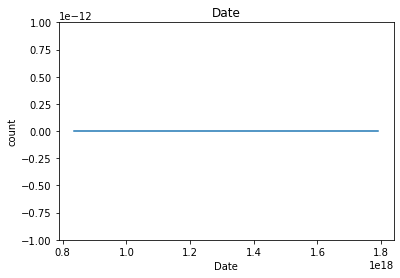

<Figure size 1080x1080 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



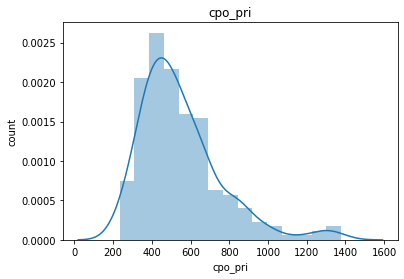

<Figure size 1080x1080 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



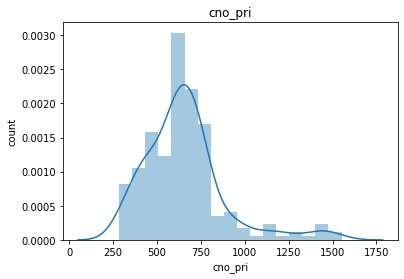

<Figure size 1080x1080 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



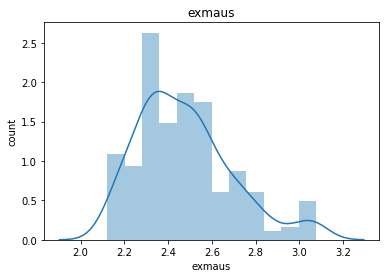

<Figure size 1080x1080 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



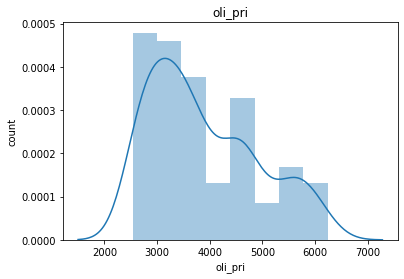

<Figure size 1080x1080 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



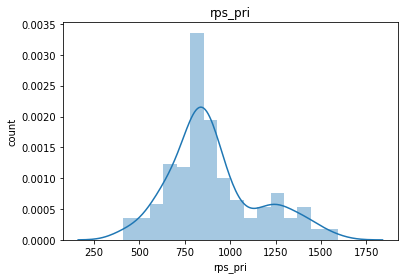

<Figure size 1080x1080 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



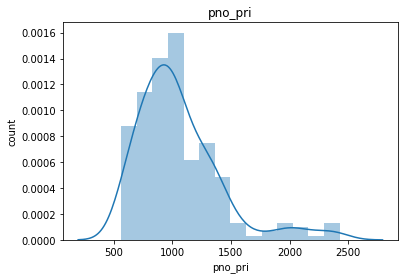

<Figure size 1080x1080 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



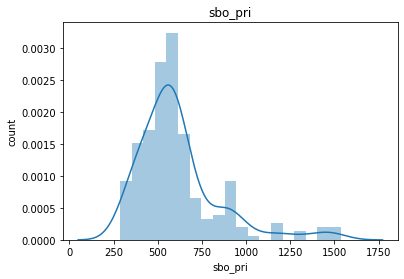

<Figure size 1080x1080 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



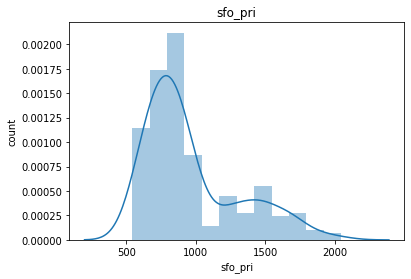

<Figure size 1080x1080 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



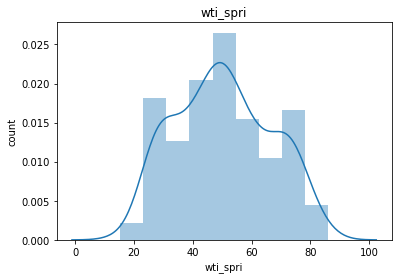

<Figure size 1080x1080 with 0 Axes>

In [74]:
for feature in continuous_feature:
    data = df.copy()
    sns.distplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.title(feature)
    plt.figure(figsize = (15,15))
    plt.show()

###Check for Outliers

####Compute the percentage of Outliers

In [75]:
for k, v in df.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[1]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column Date outliers = 0.00%
Column cpo_pri outliers = 80.00%
Column cno_pri outliers = 140.00%
Column exmaus outliers = 90.00%
Column oli_pri outliers = 0.00%
Column rps_pri outliers = 160.00%
Column pno_pri outliers = 120.00%
Column sbo_pri outliers = 160.00%
Column sfo_pri outliers = 70.00%
Column wti_spri outliers = 0.00%


In [76]:
df.set_index('Date', inplace=True)

In [95]:
df.head()

,cpo_pri,cno_pri,exmaus,oli_pri,rps_pri,pno_pri,sbo_pri,sfo_pri,wti_spri
Date,,,,,,,,,
2002-02-01,323.0,455.0,2.980725,3102.61,423.45,844.0,468.0,578.0,28.67
2002-03-01,345.0,546.0,2.980725,3100.45,415.85,799.0,485.0,557.0,24.49
2002-04-01,362.0,595.0,2.980725,3199.41,410.77,718.0,466.0,552.0,22.06
2002-05-01,376.0,636.0,2.980725,3281.67,414.82,614.0,442.0,574.0,21.64
2002-06-01,383.0,738.0,2.980725,3261.65,451.04,619.0,429.0,595.0,22.30


###Plot all the the Variables with Outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass t

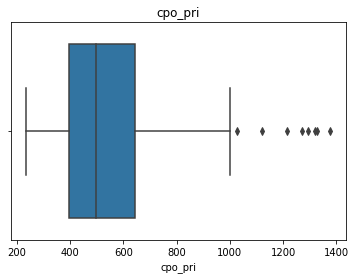

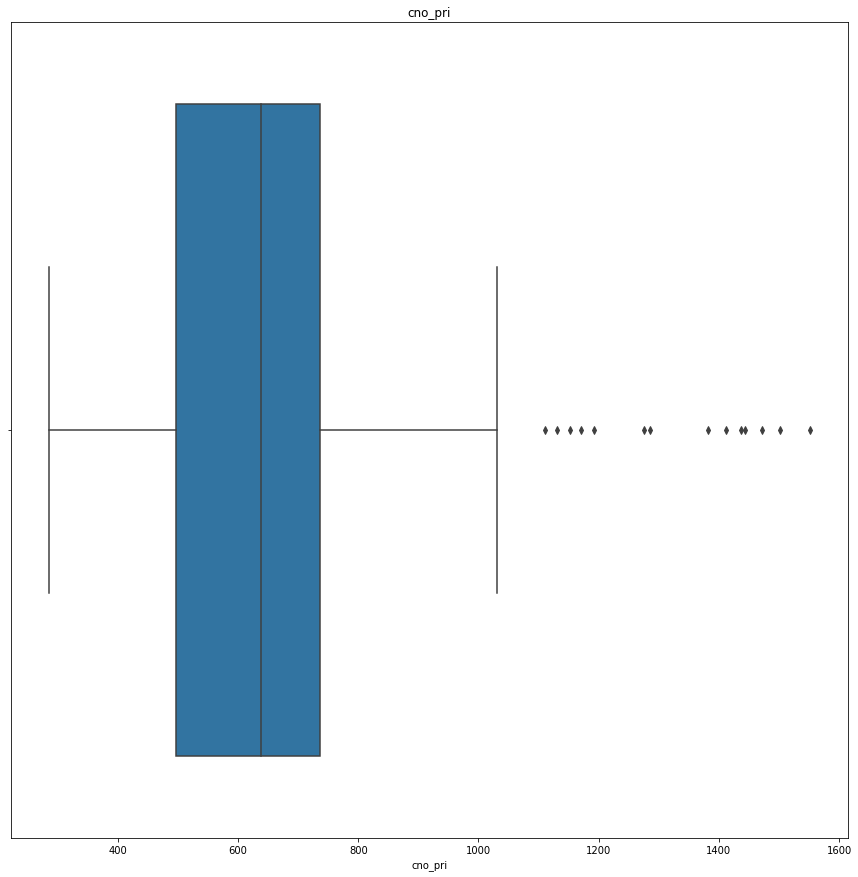

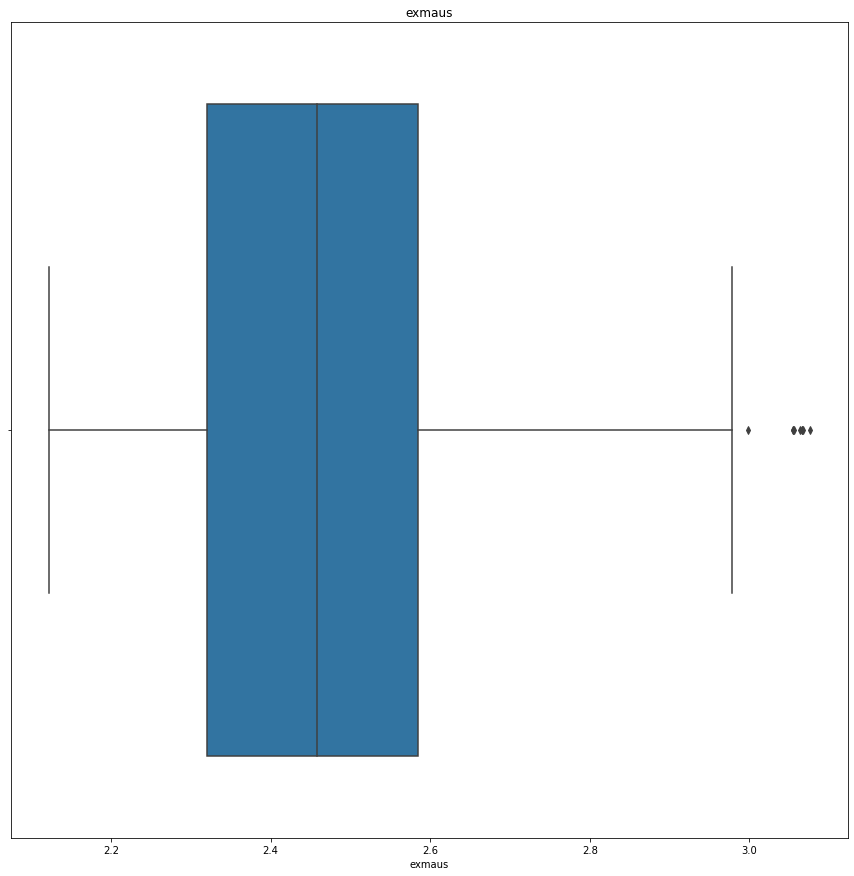

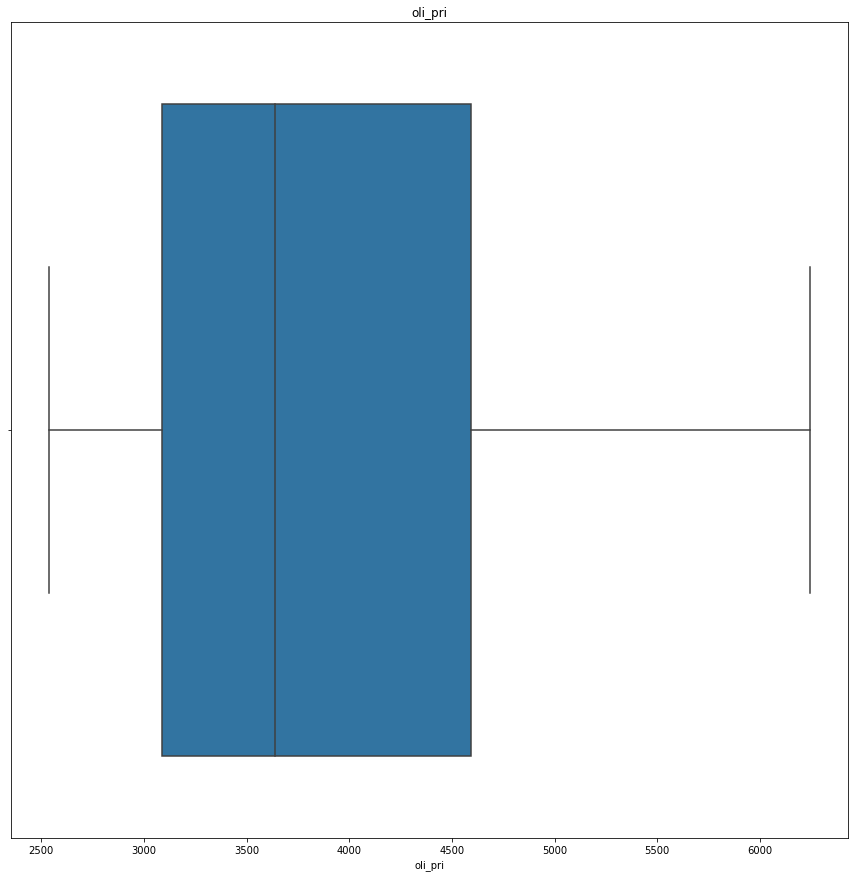

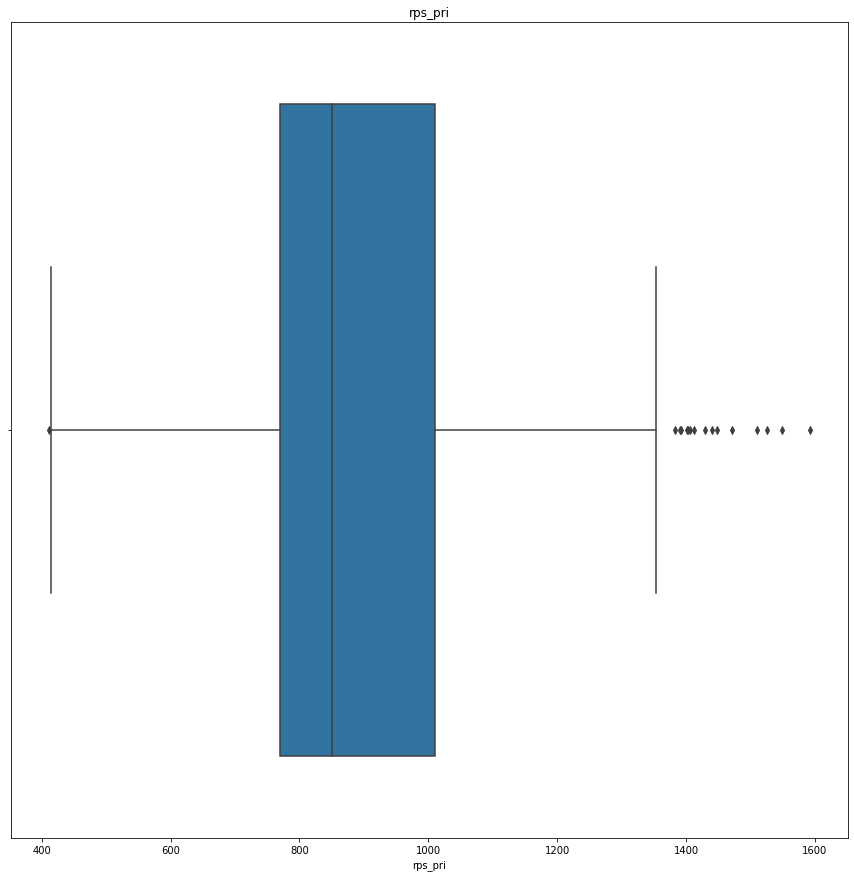

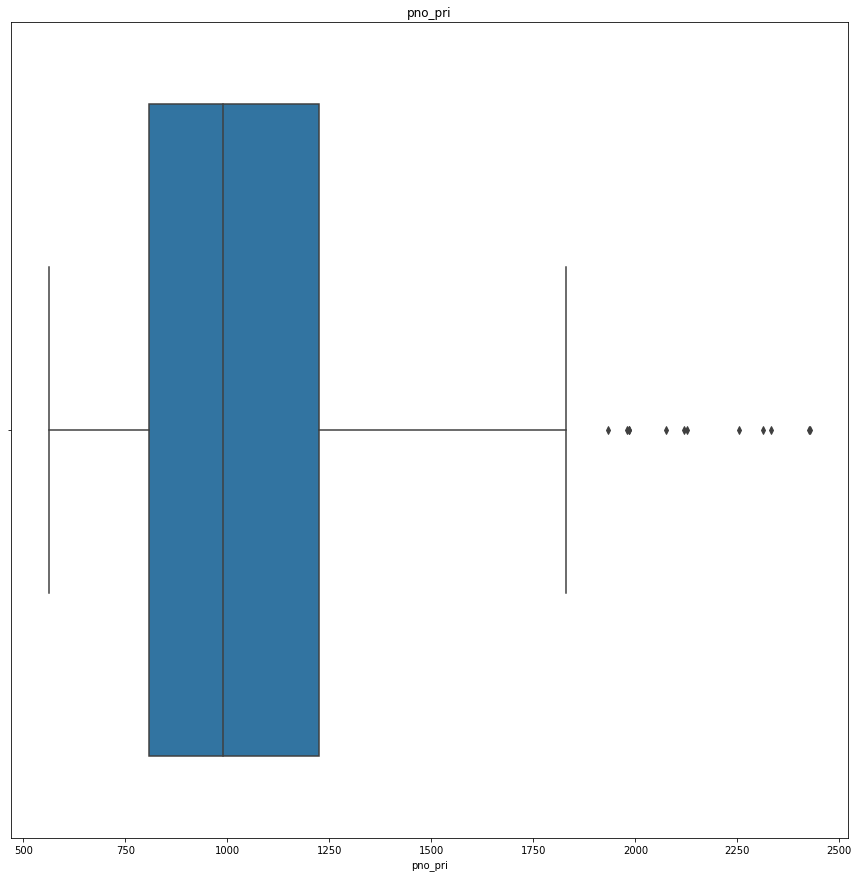

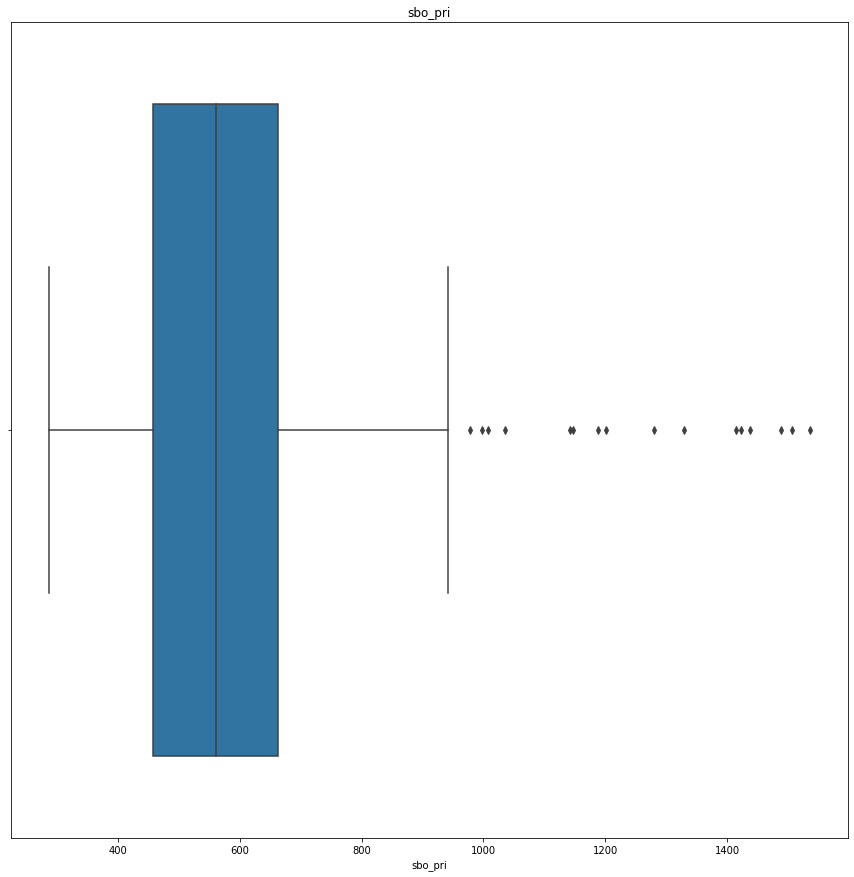

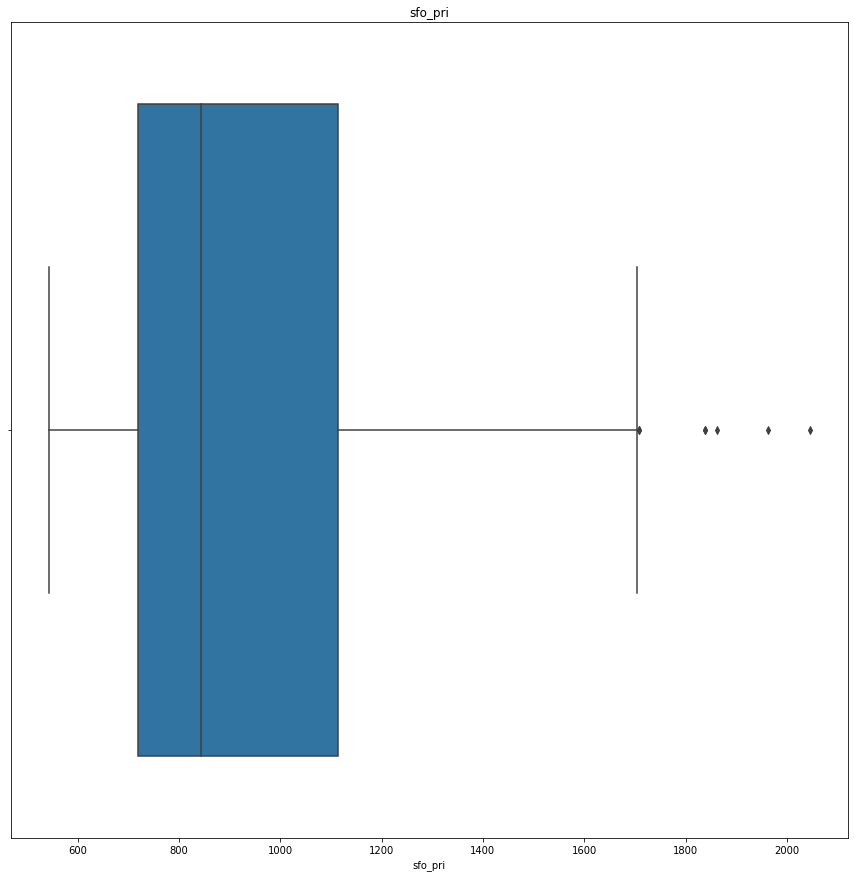

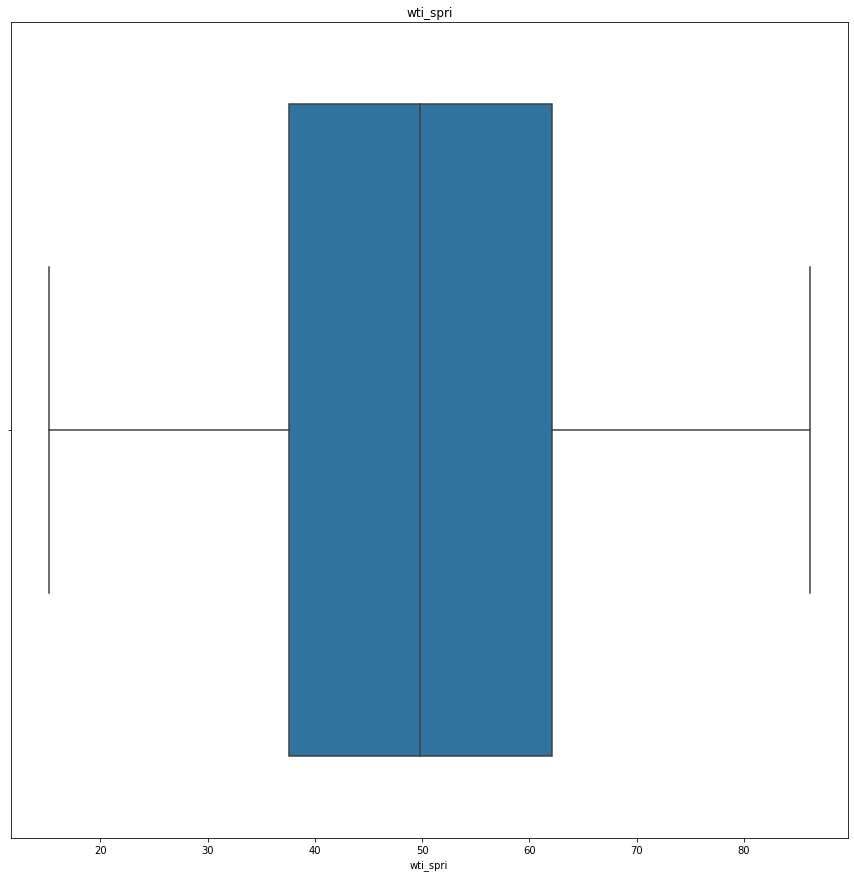

<Figure size 1080x1080 with 0 Axes>

In [78]:
for feature in df:
    sns.boxplot(df[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

Outliers were detected on these features: 
*   Crude Palm Oil Price (cpo_pri)
*   Coconut Oil Price (cno_pri)
*   Exchange rate (examus)
*   Rapeseed Oil Price (rps_pri)
*   Peanut Oil Price (pno_pri)
*   Soybean Oil Price (sbo_pri)
*   Sunflower Oil Price (sfo_pri)

###Remove Outliers

In [79]:
IQR=df.cno_pri.quantile(0.75)-df.cno_pri.quantile(0.25)
lower_bridge=df.cno_pri.quantile(0.25)-(IQR*1.5)
upper_bridge=df.cno_pri.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

139.875 1092.875


In [80]:
df.loc[df['cno_pri']>=1092.875,'cno_pri']=1092.875
df.loc[df['cno_pri']<=-139.875,'cno_pri']=-139.875

In [81]:
IQR=df.cpo_pri.quantile(0.75)-df.cpo_pri.quantile(0.25)
lower_bridge=df.cpo_pri.quantile(0.25)-(IQR*1.5)
upper_bridge=df.cpo_pri.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

28.25 1012.25


In [82]:
df.loc[df['cpo_pri']>=1012.25,'cpo_pri']=1012.25
df.loc[df['cpo_pri']<=-28.25,'cpo_pri']=-28.25

In [83]:
IQR=df.exmaus.quantile(0.75)-df.exmaus.quantile(0.25)
lower_bridge=df.exmaus.quantile(0.25)-(IQR*1.5)
upper_bridge=df.exmaus.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

1.924325 2.980725


In [84]:
df.loc[df['exmaus']>=2.9807250000000005,'exmaus']=2.9807250000000005
df.loc[df['exmaus']<=-1.924324999999999,'exmaus']=-1.924324999999999

In [85]:
IQR=df.rps_pri.quantile(0.75)-df.rps_pri.quantile(0.25)
lower_bridge=df.rps_pri.quantile(0.25)-(IQR*1.5)
upper_bridge=df.rps_pri.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

411.36375000000004 1368.63375


In [86]:
df.loc[df['rps_pri']>=1368.63375,'rps_pri']=1368.63375
df.loc[df['rps_pri']<=-411.3637500000003,'rps_pri']=-411.3637500000003

In [87]:
IQR=df.pno_pri.quantile(0.75)-df.pno_pri.quantile(0.25)
lower_bridge=df.pno_pri.quantile(0.25)-(IQR*1.5)
upper_bridge=df.pno_pri.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

180.71875 1851.46875


In [88]:
df.loc[df['pno_pri']>=1851.46875,'pno_pri']=1851.46875
df.loc[df['pno_pri']<=-180.71875,'pno_pri']=-180.71875

In [89]:
IQR=df.sbo_pri.quantile(0.75)-df.sbo_pri.quantile(0.25)
lower_bridge=df.sbo_pri.quantile(0.25)-(IQR*1.5)
upper_bridge=df.sbo_pri.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

150.51875 970.08875


In [90]:
df.loc[df['sbo_pri']>=970.08875,'sbo_pri']=970.08875
df.loc[df['sbo_pri']<=-150.51875,'sbo_pri']=-150.51875

In [91]:
IQR=df.sfo_pri.quantile(0.75)-df.sfo_pri.quantile(0.25)
lower_bridge=df.sfo_pri.quantile(0.25)-(IQR*1.5)
upper_bridge=df.sfo_pri.quantile(0.75)+(IQR*1.5)
print(lower_bridge, upper_bridge)

124.69999999999993 1707.58


In [92]:
df.loc[df['sfo_pri']>=1707.58,'sfo_pri']=1707.58
df.loc[df['sfo_pri']<=-124.69999999999993,'sfo_pri']=-124.69999999999993

###Plot of Features without Outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass t

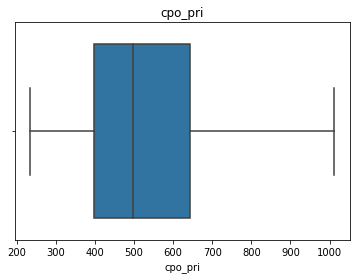

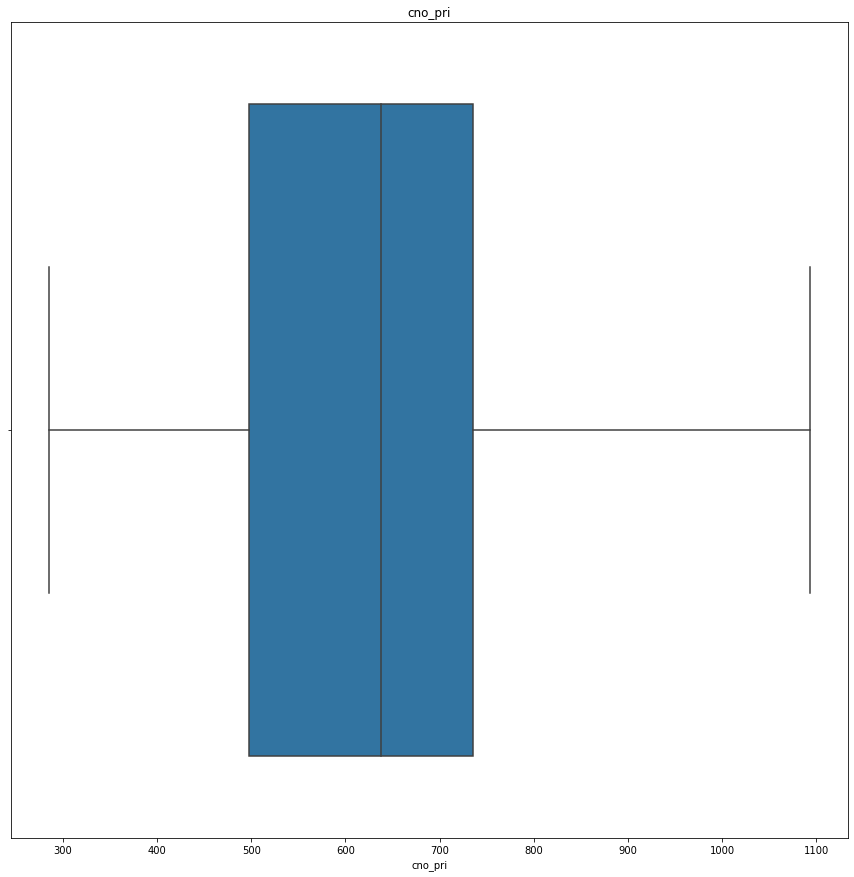

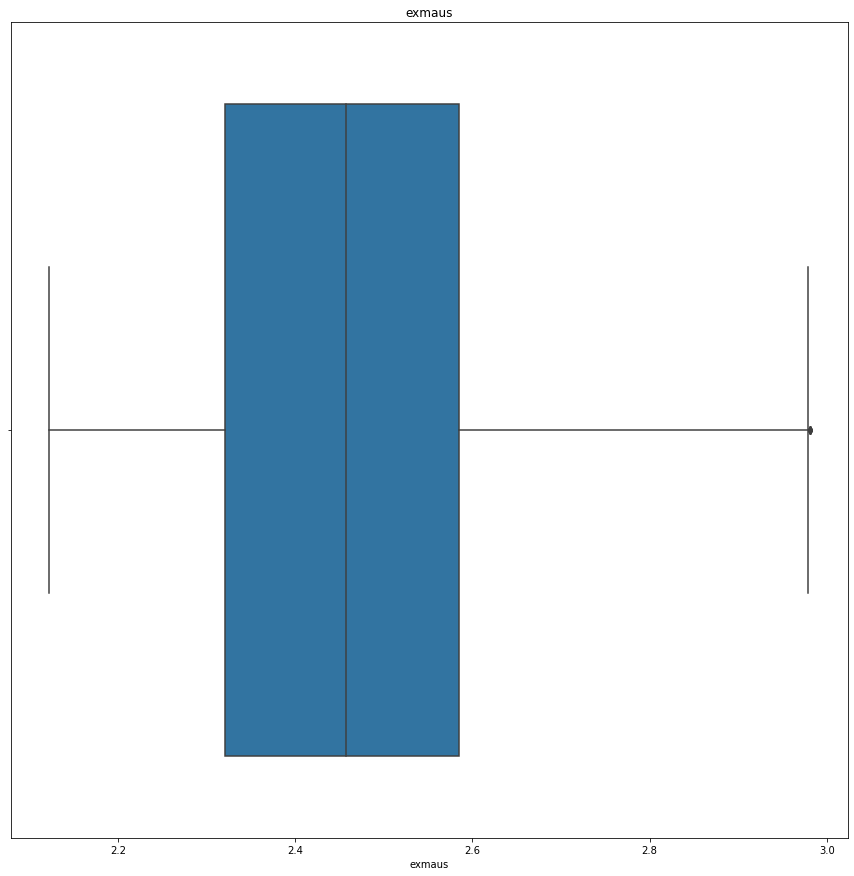

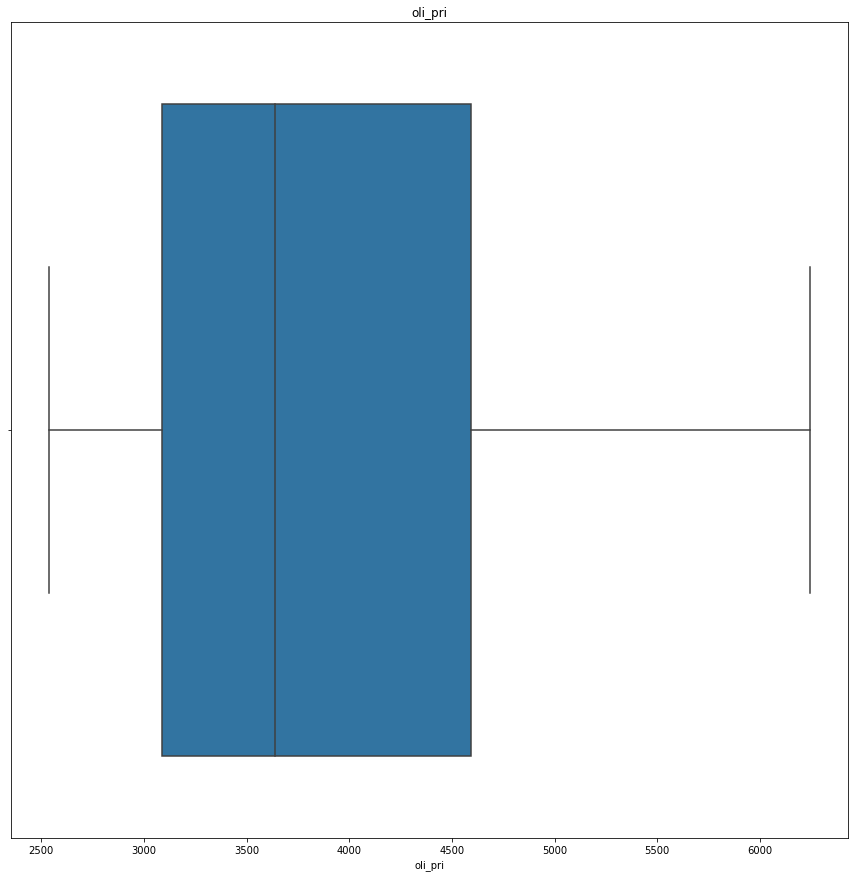

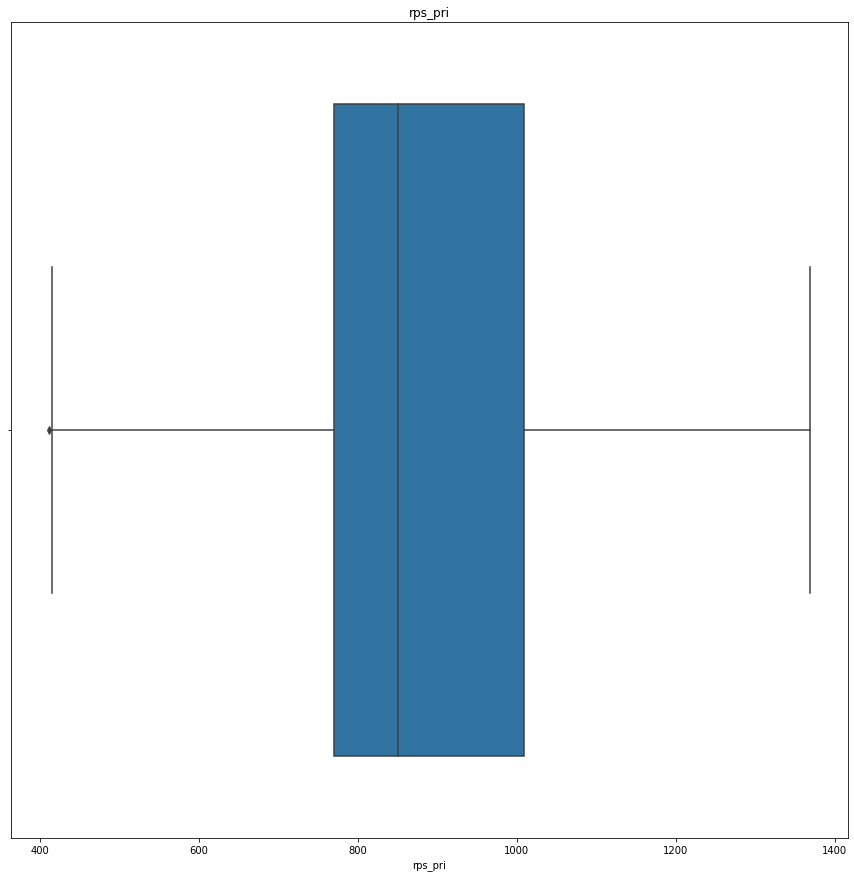

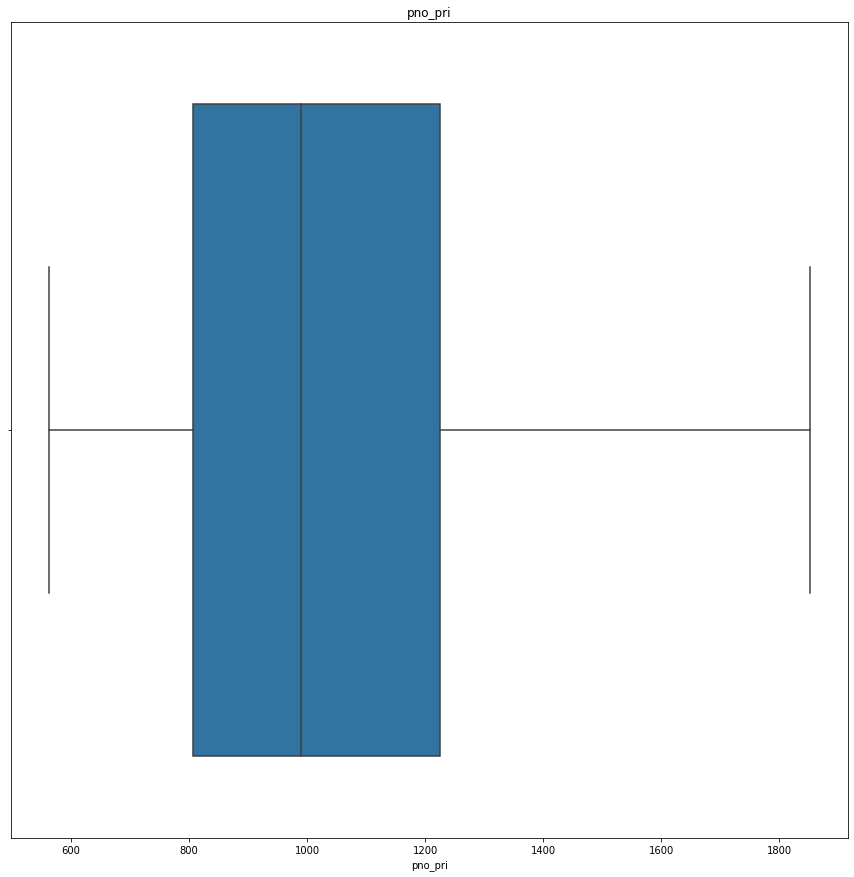

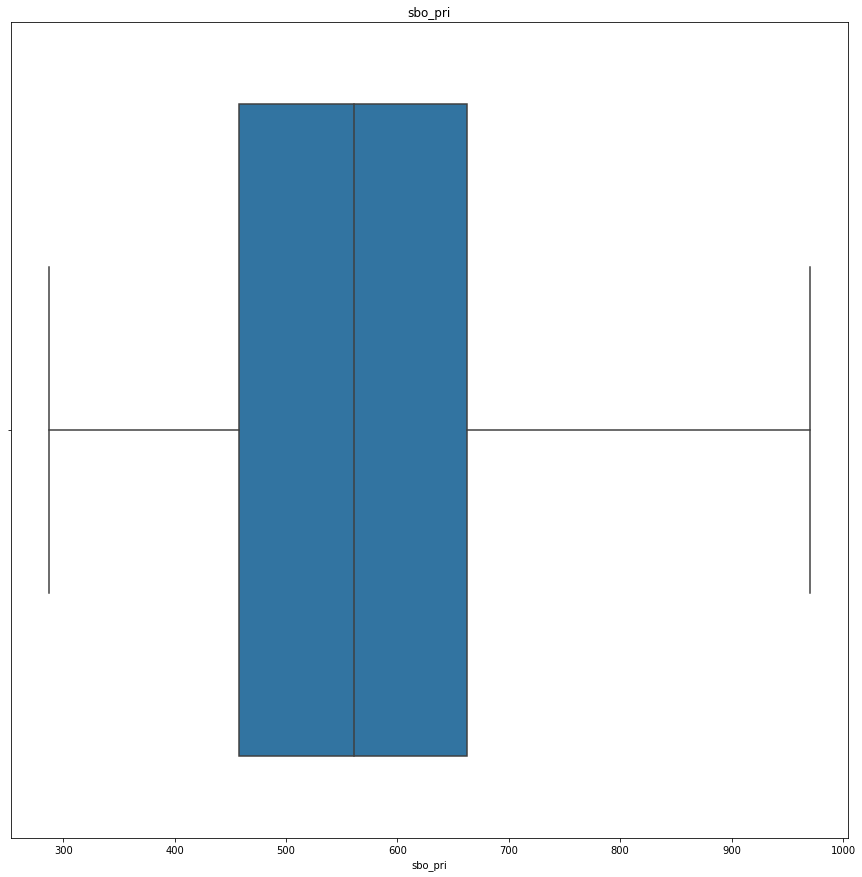

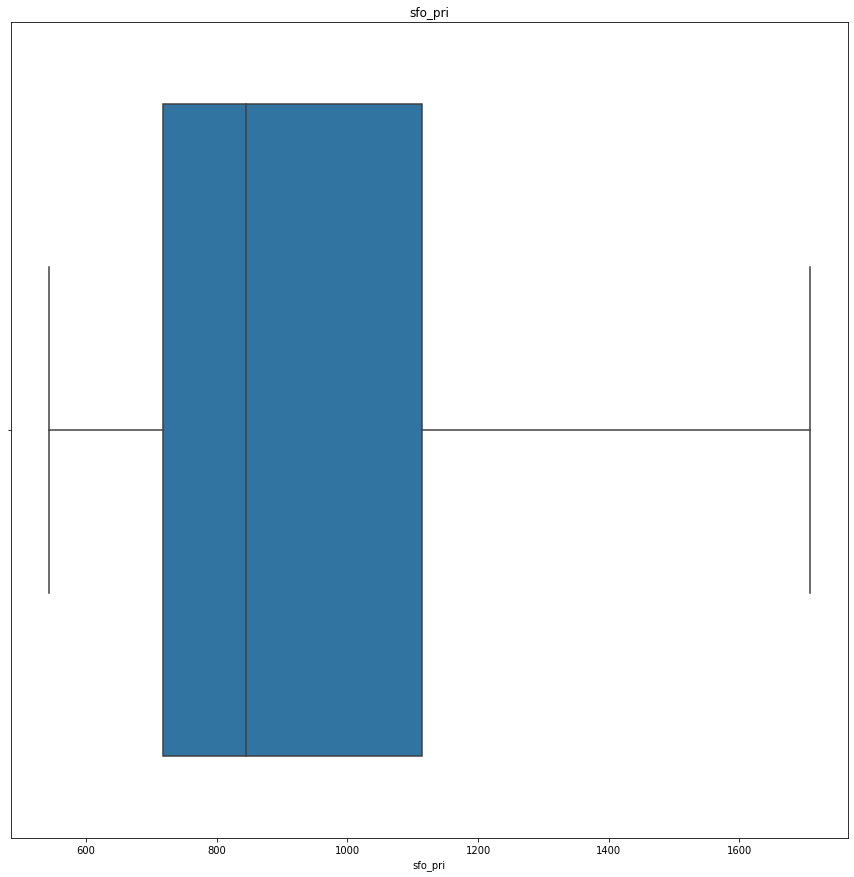

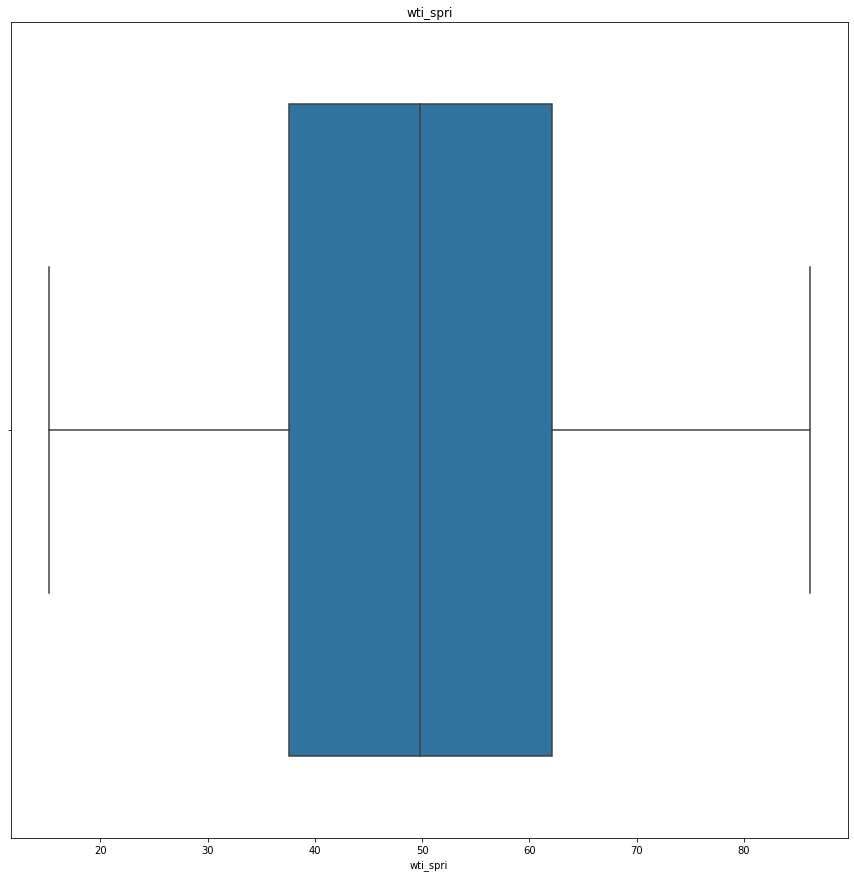

<Figure size 1080x1080 with 0 Axes>

In [96]:
for feature in data:
    data=df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

In [97]:
#Save the preprocessed to csv 
df.to_csv("preprocessed.csv")